In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("Employee_attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df1=df[["Age","DailyRate","BusinessTravel","Department","EducationField","TotalWorkingYears","YearsAtCompany","YearsSinceLastPromotion","Attrition"]]	

        

In [6]:
df1.head(2)

,Age,DailyRate,BusinessTravel,Department,EducationField,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition
0,41,1102,Travel_Rarely,Sales,Life Sciences,8,6,0,Yes
1,49,279,Travel_Frequently,Research & Development,Life Sciences,10,10,1,No


In [7]:
df1.shape

(1470, 9)

In [8]:
df1.isnull().sum()

Age                        0
DailyRate                  0
BusinessTravel             0
Department                 0
EducationField             0
TotalWorkingYears          0
YearsAtCompany             0
YearsSinceLastPromotion    0
Attrition                  0
dtype: int64

In [9]:
df1.duplicated().sum()

0

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   DailyRate                1470 non-null   int64 
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   EducationField           1470 non-null   object
 5   TotalWorkingYears        1470 non-null   int64 
 6   YearsAtCompany           1470 non-null   int64 
 7   YearsSinceLastPromotion  1470 non-null   int64 
 8   Attrition                1470 non-null   object
dtypes: int64(5), object(4)
memory usage: 103.5+ KB


In [11]:
df1.describe()

,Age,DailyRate,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,11.279592,7.008163,2.187755
std,9.135373,403.509100,7.780782,6.126525,3.222430
min,18.000000,102.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,6.000000,3.000000,0.000000
50%,36.000000,802.000000,10.000000,5.000000,1.000000
75%,43.000000,1157.000000,15.000000,9.000000,3.000000
max,60.000000,1499.000000,40.000000,40.000000,15.000000


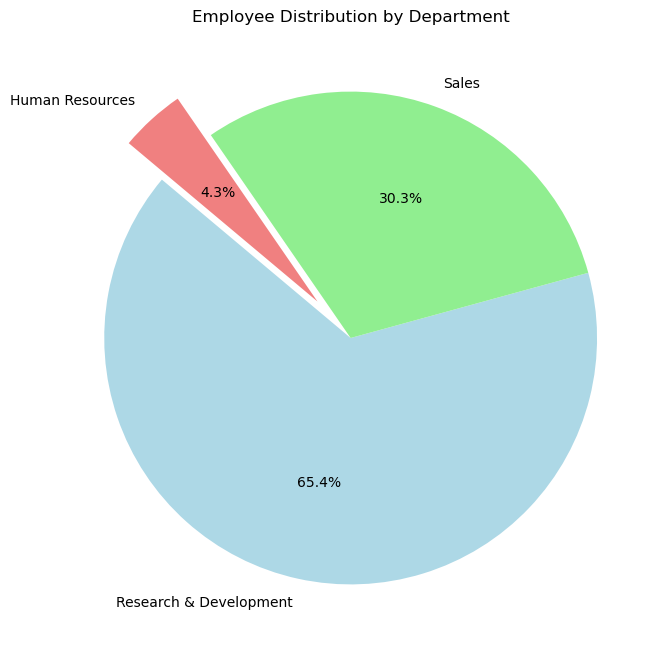

In [12]:
department_counts = df1["Department"].value_counts()

explode=[0,0,0.2]
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', colors=["lightblue", "lightgreen", "lightcoral"], startangle=140,explode=explode)
plt.title("Employee Distribution by Department")
plt.show()


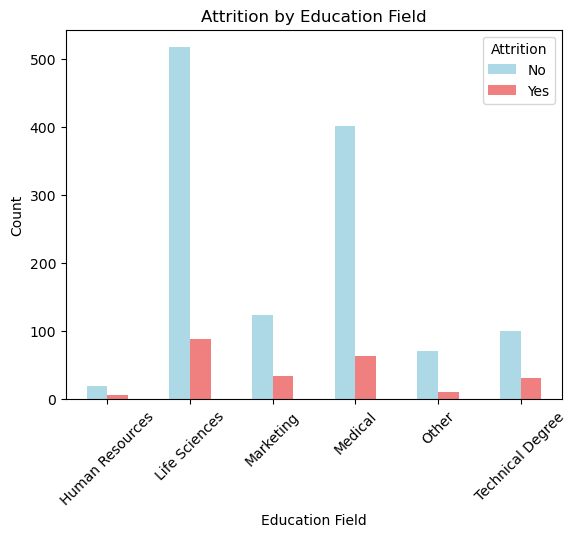

In [13]:
grouped_data = df1.groupby("EducationField")["Attrition"].value_counts().unstack()


grouped_data.plot(kind='bar', color=["lightblue", "lightcoral"])
plt.xlabel("Education Field")
plt.ylabel("Count")
plt.title("Attrition by Education Field")
plt.legend(title="Attrition", labels=["No", "Yes"],loc="upper right")
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='Age', ylabel='YearsAtCompany'>

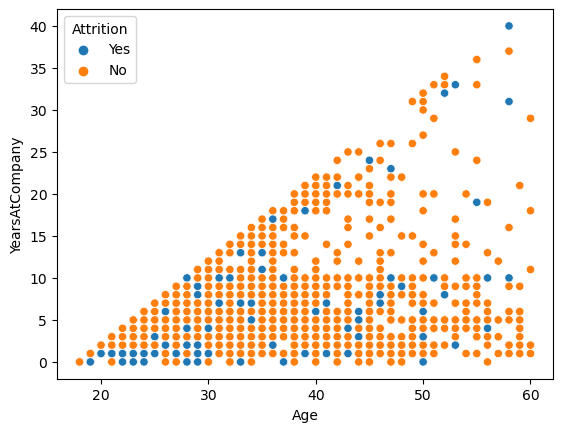

In [14]:
sns.scatterplot(x="Age",y="YearsAtCompany",data=df,hue="Attrition")

In [15]:
mapping_dict = {
    'Attrition': {' No': 0, ' Yes': 1},
    'BusinessTravel': {'Travel_Rarely': 0, ' Travel_Frequently': 1}    
}

df1_mapped = df1.replace(mapping_dict)  # Ensure correct mapping for all categorical features

# Convert categorical columns to numerical using lambda function
df2 = df1_mapped.apply(lambda x: x.astype('category').cat.codes if x.dtype == 'object' else x)


In [16]:
df2.shape

(1470, 9)

In [17]:
df2.head()

,Age,DailyRate,BusinessTravel,Department,EducationField,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition
0,41,1102,0,2,1,8,6,0,1
1,49,279,2,1,1,10,10,1,0
2,37,1373,0,1,4,7,0,0,1
3,33,1392,2,1,1,8,8,3,0
4,27,591,0,1,3,6,2,2,0


In [18]:
x = df2.drop("Attrition", axis=1)
y = df2["Attrition"]

print(x.shape, "\n\n", y.shape)

(1470, 8) 

 (1470,)


In [19]:
from  sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [21]:
x_train.shape

(1176, 8)

In [22]:
x_test.shape

(294, 8)

In [48]:
from sklearn.linear_model import LogisticRegression

gb = LogisticRegression(random_state=69)


In [49]:
gb.fit(x_train, y_train)

# Make predictions
y_pred = gb.predict(x_test)
y_pred


C:\Users\ANIRUDH\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test,y_pred)

0.8367346938775511

In [52]:
input_data=(41,1102,0,2,1,8,6,0)
np_array=np.asarray(input_data) #convet into array
reshaped_array=np_array.reshape(1,-1)
prediction=gb.predict(reshaped_array)
if prediction[0]==1:
    print("attrition should be done")
else:
    print("attrition should be not  done")

attrition should be not  done


C:\Users\ANIRUDH\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [53]:
# import pickle
# pickle.dump(gb,open("ATTRITION.pkl","wb"))

In [54]:
import joblib

In [55]:
joblib.dump(gb, "ATTRITION.pkl")

['ATTRITION.pkl']